In [127]:
import pandas as pd
import numpy as np

# Data importing

In [128]:
df = pd.read_excel("A1_Data.xlsx")

# Data cleaning

In [129]:
A=list(df['days_on_market'])
np.unique(A, return_counts=True)

(array(['High', 'Low'], dtype='<U4'), array([12429, 16080]))

In [130]:
df['number_of_beds'].unique()

array([ 5,  3,  4,  2,  0,  1,  7,  6,  8, 18,  9, 12, 57, 22, 11, 16, 19,
       28, 24, 14, 10, 30])

In [131]:
df['number_of_baths'].unique()

array([ 2,  0,  3,  1,  4,  5,  6,  9, 12, 17,  7,  8, 10, 28, 14])

In [132]:
df['number_of_parks'].unique()

array([ 2,  3,  1,  0,  4,  6,  5,  9,  8,  7, 10, 15, 13, 11, 12, 22, 14,
       20])

In [133]:
df = df[(df['number_of_beds'] <= 30) & (df['number_of_baths'] < 28) & (df['number_of_parks'] < 20)]

In [134]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'description', 'address', 'listed_price', 'state', 'postcode'], axis=1, inplace=True)

In [135]:
cleaned_df1=df.drop_duplicates(subset=df.columns[2:], inplace=True)
cleaned_df1=df.reset_index(inplace=True, drop=True)

In [136]:
cleaned_df1=df.dropna(subset=['average_days_on_market', 'average_median_price'], inplace=True)
cleaned_df1=df.reset_index(drop=True)

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
known_cols = ['number_of_beds', 'number_of_baths', 'number_of_parks']
target_col = 'property_size'

In [139]:
train_df = cleaned_df1.dropna(subset=[target_col])
test_df = df[df[target_col].isna()]

In [140]:
X_train = train_df[known_cols]
y_train = train_df[target_col]
X_test = test_df[known_cols]

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = model.predict(X_test)

In [143]:
cleaned_df1.loc[cleaned_df1[target_col].isna(), target_col] = y_pred

In [144]:
cleaned_df1['property_size'] = cleaned_df1['property_size'].round(0)
cleaned_df1['average_days_on_market'] = cleaned_df1['average_days_on_market'].round(0)
cleaned_df1['average_median_price'] = cleaned_df1['average_median_price'].round(0)

In [145]:
df2 = cleaned_df1.drop(['listed_date', 'sold_date'], axis=1)

# Transforming categorical variable

In [147]:
nominal_columns=df2.select_dtypes(include= ['object']) 
numerical_columns=df2.select_dtypes(exclude= ['object']) 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

nominal_converted = nominal_columns.apply(le.fit_transform)  

df3 = pd.concat([numerical_columns, nominal_converted], axis=1)

# k_Means

In [148]:
from sklearn.cluster import KMeans

In [149]:
My_kmeans = KMeans(n_clusters=3, max_iter=10000)

In [150]:
My_kmeans.fit(df3)

KMeans(max_iter=10000, n_clusters=3)

In [151]:
KMeansLables = My_kmeans.labels_

In [152]:
KMeansCentroids = My_kmeans.cluster_centers_

In [153]:
KMeansCentroids

array([[2.87457650e+00, 1.67322128e+00, 1.68438185e+00, 5.68202152e+02,
        3.90732080e+01, 7.27877303e+05, 6.95624910e+05, 6.44854846e-01,
        5.26752142e+00, 1.05716934e+02, 5.80017272e-01],
       [3.00000000e+00, 1.00000000e+00, 4.00000000e+00, 1.03700000e+03,
        2.40000000e+01, 1.07500000e+06, 1.60000000e+09, 0.00000000e+00,
        5.00000000e+00, 1.62000000e+02, 1.00000000e+00],
       [4.19417820e+00, 2.47035854e+00, 2.36173234e+00, 9.11605609e+02,
        4.20560880e+01, 1.47382086e+06, 1.86069827e+06, 1.72168974e-01,
        4.93716720e+00, 1.08532126e+02, 5.84309549e-01]])

In [154]:
KMeansLables

array([2, 0, 0, ..., 2, 2, 0], dtype=int32)

# Agglomerative

In [155]:
from sklearn.cluster import AgglomerativeClustering

In [156]:
My_Agglomerative = AgglomerativeClustering (n_clusters = 3, affinity = "euclidean")

In [157]:
My_Agglomerative=My_Agglomerative.fit(df3)

In [158]:
AgglomerativeLables=My_Agglomerative.labels_

# Elbow method

In [159]:
from sklearn.metrics import silhouette_score
distortions = []
for k in range (2,10):
    My_KMeans = KMeans(n_clusters=k)
    My_KMeans.fit(df3)
    score = silhouette_score(df3, My_KMeans.labels_, metric='euclidean')
    distortions.append(score)

In [160]:
import matplotlib.pyplot as plt

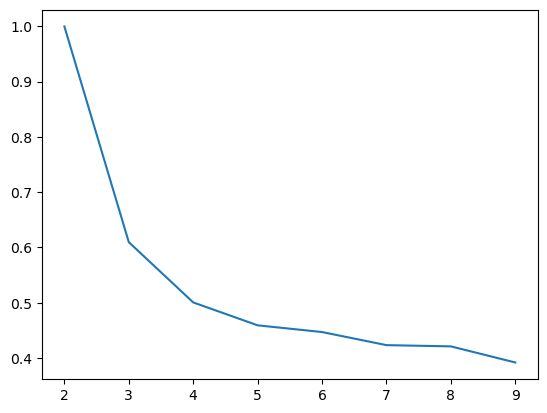

In [161]:
plt.plot(range (2,10), distortions)
plt.show()

# Decision tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
DTclf = DecisionTreeClassifier (max_depth = 3)

In [164]:
y = df3 ["days_on_market"]
X = df3.drop(columns=['days_on_market'])

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [166]:
DTclf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [167]:
df4=df3.drop(columns=['days_on_market'])

In [168]:
print(DTclf.predict(df4))

[1 1 0 ... 1 1 1]


In [169]:
from sklearn import tree

In [170]:
print(tree.export_text(DTclf))

|--- feature_1 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_4 <= 34.00
|   |   |   |--- class: 0
|   |   |--- feature_4 >  34.00
|   |   |   |--- class: 1
|   |--- feature_8 >  0.50
|   |   |--- feature_8 <= 6.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  6.50
|   |   |   |--- class: 0
|--- feature_1 >  0.50
|   |--- feature_4 <= 22.50
|   |   |--- feature_4 <= 14.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  14.50
|   |   |   |--- class: 0
|   |--- feature_4 >  22.50
|   |   |--- feature_3 <= 20.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  20.00
|   |   |   |--- class: 1



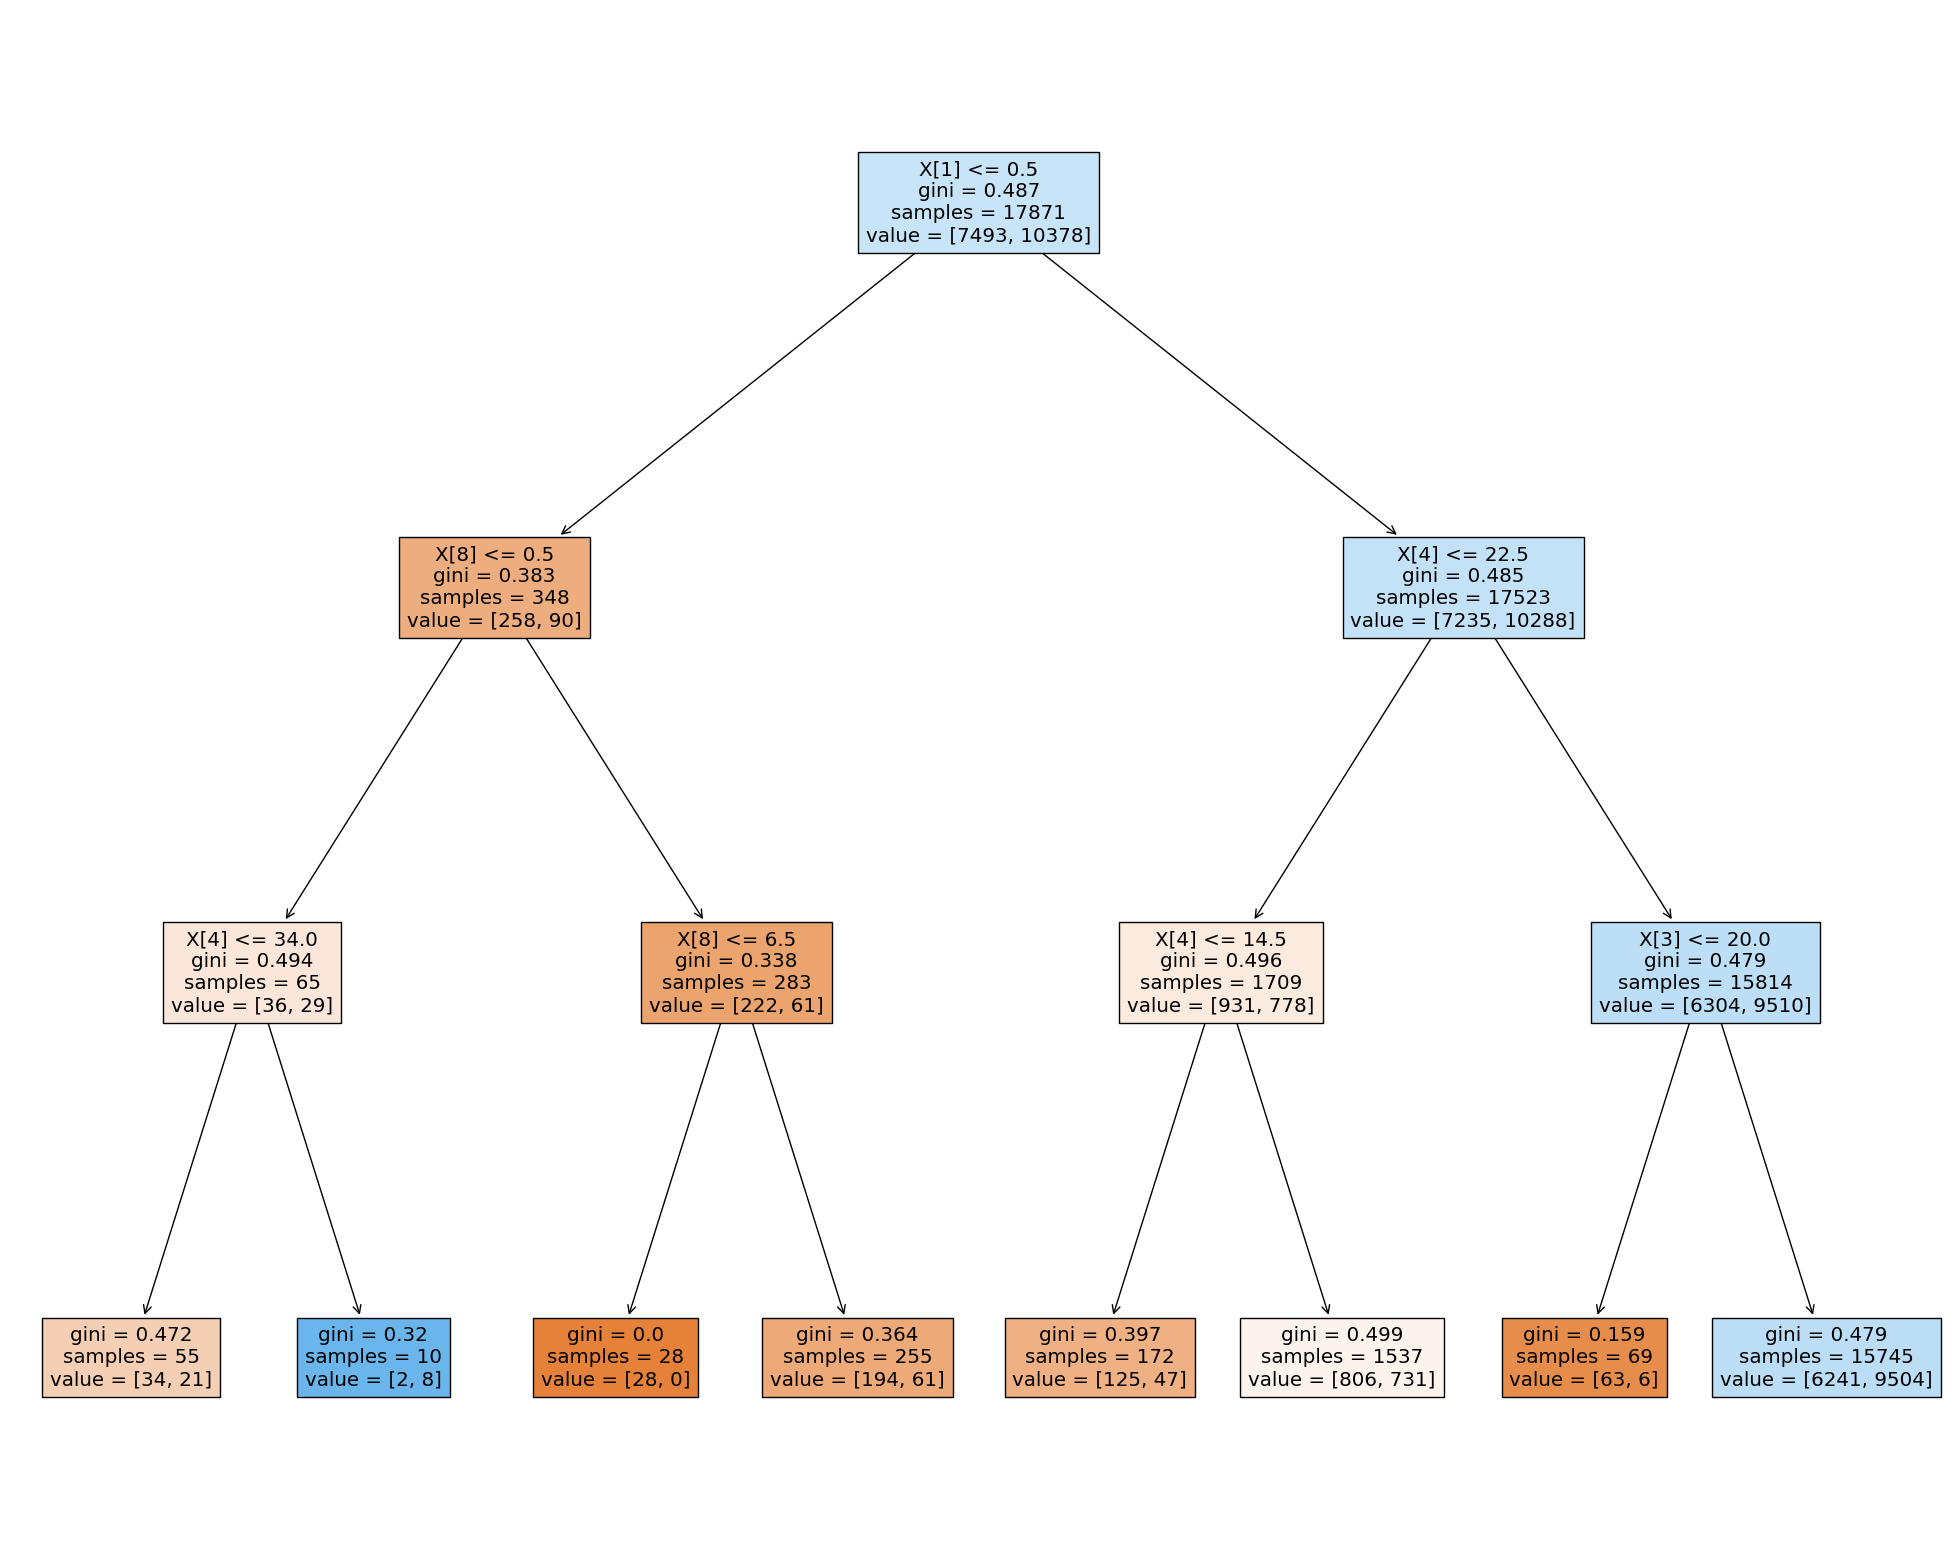

In [171]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTclf, filled=True)

# Decision tree (cross validation)

In [172]:
from sklearn.model_selection import cross_val_score
for m in ['accuracy','recall', 'precision']:
    scores = cross_val_score(DTclf, X, y, cv=10, scoring=m)
    print(m, scores)
    print(m, scores.mean())

accuracy [0.58780761 0.58254057 0.60156687 0.60772244 0.60436486 0.60100727
 0.59820929 0.60324566 0.5954113  0.59205372]
accuracy 0.5973929598429624
recall [0.89306358 0.83702989 0.93346191 0.92292871 0.95568401 0.98747592
 0.96531792 0.98843931 0.87283237 0.94412331]
recall 0.9300356928519535
precision [0.59690921 0.60069204 0.60086903 0.60671311 0.60012099 0.5942029
 0.59501188 0.59547301 0.60521042 0.59357965]
precision 0.5988782233418365


# Random forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
RFclf = RandomForestClassifier(max_depth=5, random_state=0)

In [175]:
RFclf.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=0)

In [176]:
print(RFclf.predict(df4))

[1 1 0 ... 1 1 1]


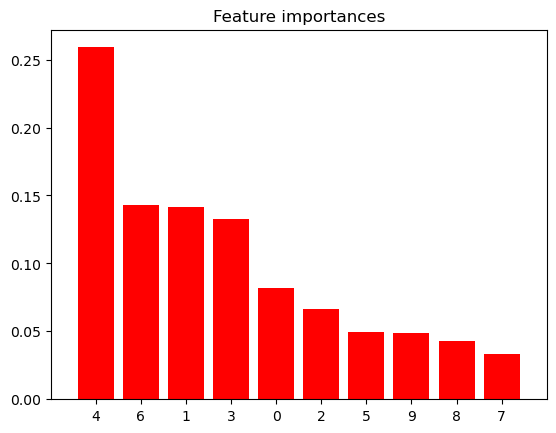

In [177]:
importances = RFclf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Random forest (cross validation)

In [178]:
from sklearn.model_selection import cross_val_score
for m in ['accuracy','recall', 'precision']:
    scores = cross_val_score(RFclf, X, y, cv=10, scoring=m)
    print(m, scores)
    print(m, scores.mean())

accuracy [0.59395973 0.61219922 0.60548405 0.60772244 0.61052043 0.60716284
 0.60660325 0.61108002 0.60716284 0.60996083]
accuracy 0.6071855646484865
recall [0.93063584 0.96239151 0.95564127 0.95953757 0.9672447  0.95183044
 0.95568401 0.96917148 0.95375723 0.94315992]
recall 0.9549053981490255
precision [0.5962963  0.60411622 0.60060606 0.60181269 0.60264106 0.60243902
 0.60157671 0.60275614 0.60218978 0.60544218]
precision 0.6019876161751387


# ANN

In [179]:
from sklearn.neural_network import MLPClassifier

In [180]:
My_ANNclf = MLPClassifier(hidden_layer_sizes=(25,), max_iter=500)

# ANN (cross validation)

In [181]:
from sklearn.model_selection import cross_val_score
for m in ['accuracy','recall', 'precision']:
    scores = cross_val_score(My_ANNclf, X, y, cv=10, scoring=m)
    print(m, scores)
    print(m, scores.mean())

accuracy [0.42114094 0.57806379 0.5775042  0.41745943 0.42529379 0.57414661
 0.57974259 0.42081701 0.41969782 0.58142138]
accuracy 0.49952875540349206
recall [0.98458574 0.35583414 0.99132112 0.98747592 0.06840077 0.9894027
 0.96531792 0.99421965 0.02312139 0.        ]
recall 0.6359679340323261
precision [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
precision 0.5722685478196783


# KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
My_KNN = KNeighborsClassifier(n_neighbors = 5)

# KNN (cross validation)

In [184]:
for m in ['accuracy','recall', 'precision']:
    scores_KNN = cross_val_score(My_KNN, X, y, cv=10, scoring=m)
    print(m, scores)
    print(m, scores.mean())

/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

accuracy [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
accuracy 0.5722685478196783


/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

recall [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
recall 0.5722685478196783


/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/brooke/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

precision [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
precision 0.5722685478196783


# NB

In [185]:
from sklearn.naive_bayes import GaussianNB

In [186]:
My_NB = GaussianNB ()

# NB (cross validation)

In [187]:
for m in ['accuracy','recall', 'precision']:
    scores_NB = cross_val_score(My_NB, X, y, cv=10, scoring=m)
    print(m, scores)
    print(m, scores.mean())

accuracy [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
accuracy 0.5722685478196783
recall [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
recall 0.5722685478196783
precision [0.58380844 0.58300283 0.58660508 0.61884817 0.59850034 0.4
 0.57472661 0.58567164 0.61071429 0.58080808]
precision 0.5722685478196783


# ROC

In [188]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [190]:
DTclf.fit(X_train, y_train)
dtc_y_score = DTclf.predict_proba(X_test)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc_y_score)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

In [191]:
RFclf.fit(X_train, y_train)
rfc_y_score = RFclf.predict_proba(X_test)[:,1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_y_score)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

In [192]:
My_ANNclf.fit(X_train, y_train)
ann_y_score = My_ANNclf.predict_proba(X_test)[:,1]
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_y_score)
roc_auc_ann = auc(fpr_ann, tpr_ann)

In [193]:
My_KNN.fit(X_train, y_train)
knn_y_score = My_KNN.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_y_score)
roc_auc_knn = auc(fpr_knn, tpr_knn)

In [194]:
My_NB.fit(X_train, y_train)
nb_y_score = My_NB.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_y_score)
roc_auc_nb = auc(fpr_nb, tpr_nb)

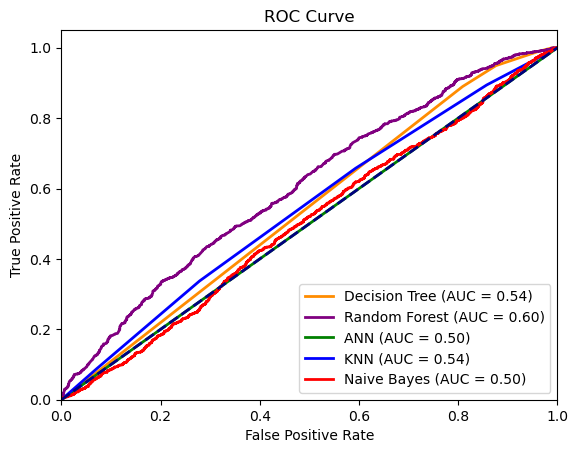

In [195]:
plt.figure()
lw = 2
plt.plot(fpr_dtc, tpr_dtc, color='darkorange',
         lw=lw, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_rfc, tpr_rfc, color='purple',
         lw=lw, label='Random Forest (AUC = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_ann, tpr_ann, color='green',
         lw=lw, label='ANN (AUC = %0.2f)' % roc_auc_ann)
plt.plot(fpr_knn, tpr_knn, color='blue',
         lw=lw, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color='red',
         lw=lw, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()